## Loan Approval Prediction

### For Infopillar Solution 

#### By Apurva Acharya

The given dataset contains attributes using which we predict whether a person gets a loan approved or not.

### Import necessary modules and libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [3]:
data=pd.read_csv("D:\Infopillar Internship\LoanPred.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset has 614 rows and 13 columns.

### Looking for null values

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in the Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History columns.

In [7]:
#Impute missing values for Gender
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

# Impute missing values for LoanAmount
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

# Impute missing values for Loan_Amount_Term
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)


In [8]:
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

In [9]:
#Converting all values to numerical data
from sklearn import preprocessing

for var in cat:
    le = preprocessing.LabelEncoder()
    data[var]=le.fit_transform(data[var].astype('str'))
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

<AxesSubplot:>

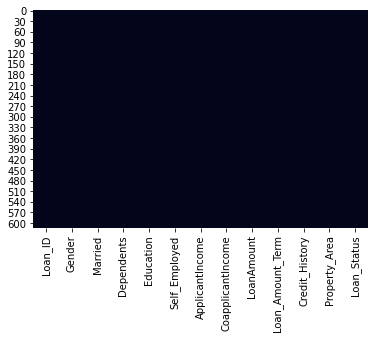

In [10]:
sns.heatmap(data.isnull(),cbar=False)

The dataset is free of null values now.

In [11]:
#Dropping irrelevant column for EDA
data.drop(['Loan_ID'],axis=1,inplace=True)

In [12]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [13]:
dup=data.duplicated().sum()
print(dup)

0


The datset has no duplicates in the datset.

### Looking for outliers

<AxesSubplot:>

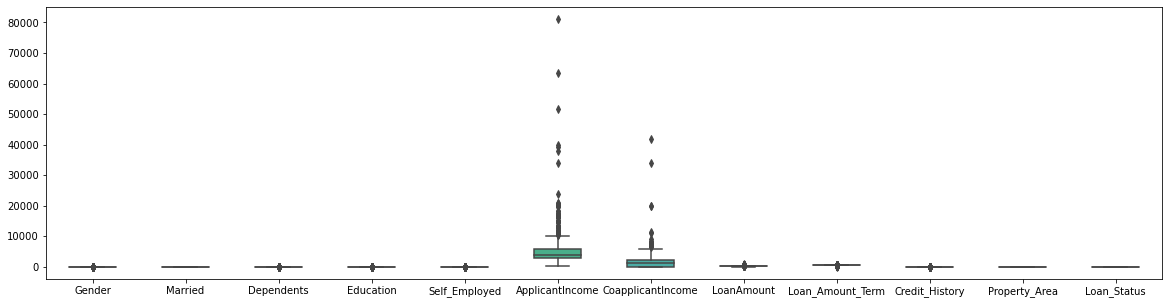

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,width=0.5)

The columns ApplicantIncome and CoapplicantIncome have outliers.

<AxesSubplot:xlabel='ApplicantIncome'>

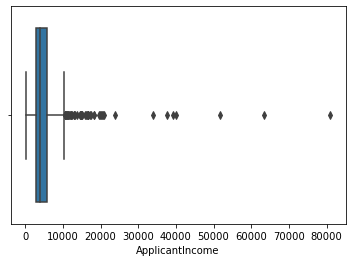

In [15]:

sns.boxplot(data['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

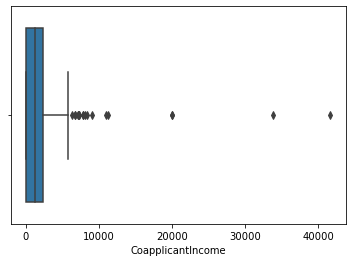

In [16]:
sns.boxplot(data['CoapplicantIncome'])

In [17]:
data[(data['ApplicantIncome']>30000)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,1,1,3,0,0,39999,0.0,600.0,180.0,0,1,1
171,1,1,3,0,0,51763,0.0,700.0,300.0,1,2,1
183,1,1,1,0,0,33846,0.0,260.0,360.0,1,1,0
185,1,1,0,0,1,39147,4750.0,120.0,360.0,1,1,1
333,1,1,0,0,2,63337,0.0,490.0,180.0,1,2,1
409,1,1,3,0,0,81000,0.0,360.0,360.0,0,0,0
443,1,0,1,0,0,37719,0.0,152.0,360.0,1,1,1


In [18]:
#Removing outliers
data.drop([155,171,183,185,333,409,443],inplace=True)

In [19]:
data[(data['CoapplicantIncome']>10000)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1,1,0
177,1,1,3,0,0,5516,11300.0,495.0,360.0,0,1,0
402,1,0,0,0,0,2500,20000.0,103.0,360.0,1,1,1
417,1,1,2,0,1,1600,20000.0,239.0,360.0,1,2,0
581,1,0,0,0,0,1836,33837.0,90.0,360.0,1,2,0
600,0,0,3,0,2,416,41667.0,350.0,180.0,1,2,0


In [20]:
#Removing outliers
data.drop([9,177,402,417,581,600],inplace=True)

In [21]:
data.shape

(601, 12)

Now the dataset has 614 rows and 12 columns.

<AxesSubplot:ylabel='Loan_Status'>

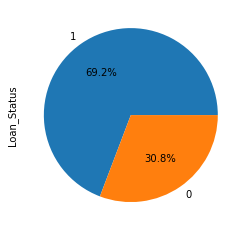

In [22]:
data['Loan_Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

69.2% people from the datset had their loan approved, while the rest did not.

### Univariate Analysis

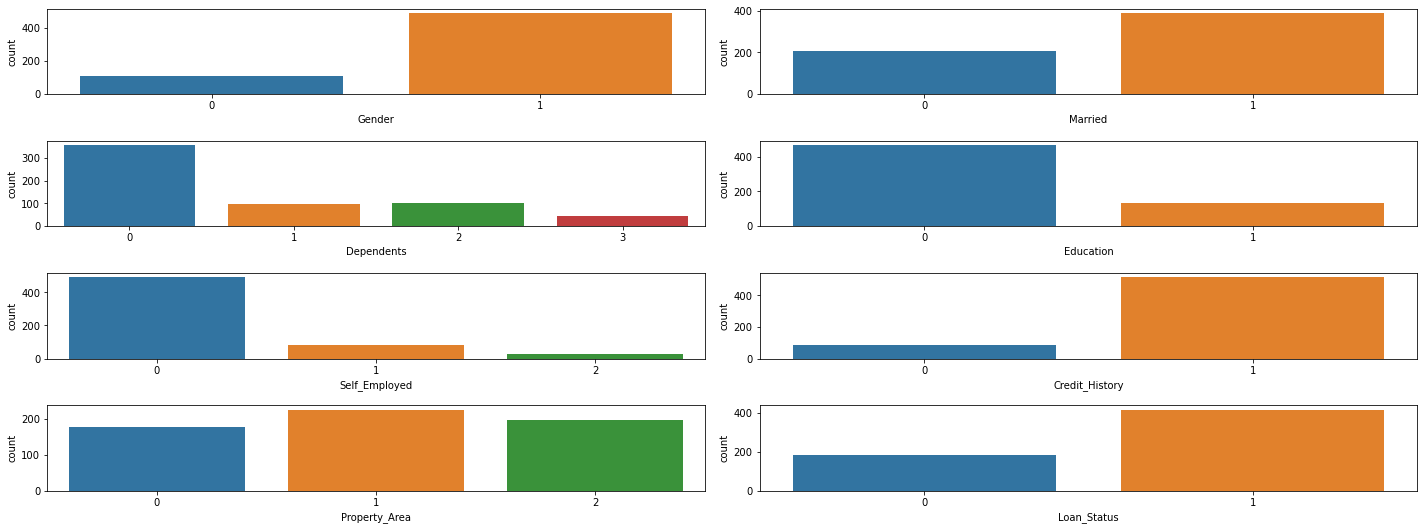

In [23]:
j=1
fig=plt.figure(figsize=(20,20))

for i in cat:
    plt.subplot(11,2,j)
    sns.countplot(x=i,data=data)
    j=j+1
    fig.tight_layout(pad=1.5)

There seems to be more relation between credit history and loan status.

<AxesSubplot:>

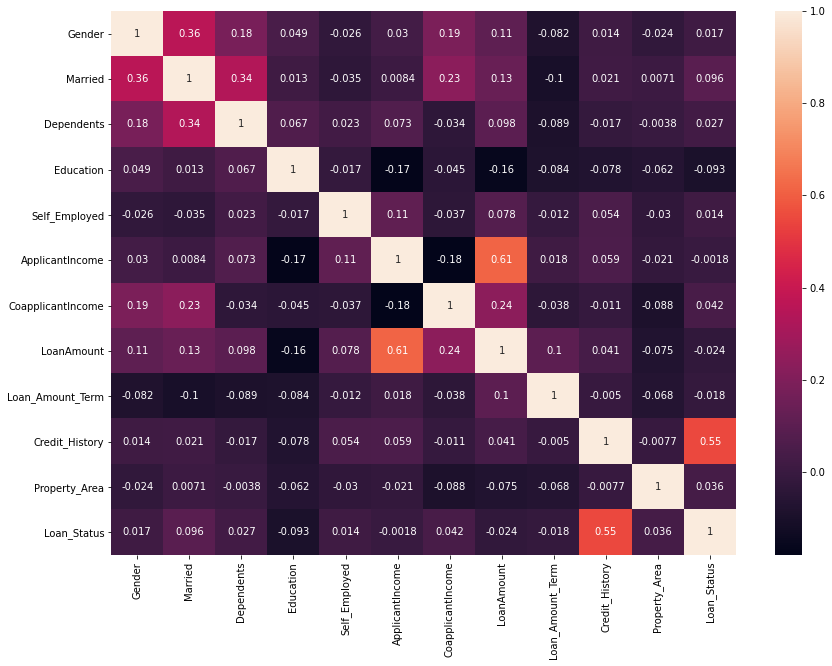

In [24]:
plt.figure(figsize=(14,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

We see a positive correlation coefficient in Credit_History and Loan_Status, which confirms the observation of univariate analysis.

Also the LoanAmount and ApplicantIncome has a strong positive correlation.

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

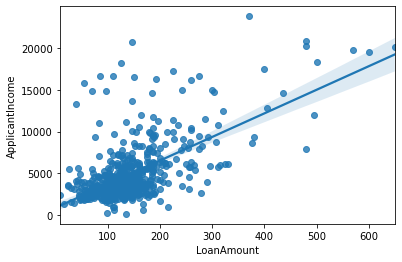

In [25]:
plt.figure(figsize=(6,4))
sns.regplot(x='LoanAmount',y='ApplicantIncome',data=data)

Applicant Income and Loan Amount are directly proportional.

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

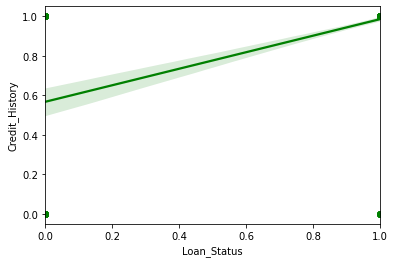

In [26]:
plt.figure(figsize=(6,4))
sns.regplot(x='Loan_Status',y='Credit_History',data=data,color='green')

The probability of loan being approved increases as Credit History approaches 1.

In [27]:
x = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']
# determining the shape of x and y.
print(x.shape)
print(y.shape)

(601, 11)
(601,)


### Splitting the dataset into training and testing data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [29]:
#MinMAxScaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Modeling

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test  = rf.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rf_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rf_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.8211920529801324


In [32]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train,y_pred_rf_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_rf_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))

print('\n')

print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_rf_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_rf_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.0
Mean Absolute Error           : 0.0
Root mean Square Error (RMSE) : 0.0


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.17880794701986755
Mean Absolute Error           : 0.17880794701986755
Root mean Square Error (RMSE) : 0.4228568871614456
